# Deep Learning for Robotics Week 04: 
## Recurrent Neural Networks

Here we will be working through the final week of the Intel Deep Learning for Robotics class. This class focuses on RNNs and their use in robotics. We note that we did not translate the code into TensorFlow due to the large volume, and instead tried to focus on the theory.

### Tutorial

Much of the beginning of this weeks tutorial focuses on introducing RNNs. As we have already covered much of this in our Dive Into RNNs notebook we will skip to more relevant information.

The benchmark RNN dataset that is introduced in the class is the Sequence MNIST. This is the same data as the well known MNIST hand written digits dataset, but the approach to the goal is slightly different. In this case we want to classify the digit by looking one pixel at a time. We then consider six different RNN structures -- which we note is many more than we covered in our other notebook introducing RNNs. The standard RNN, LSTM, and GRUs are among the seven, but we also see intersection RNNs, peephole RNNs, and UGRNNs. We will give a brief overview of each of these previously un-dsicussed architechtures.

The following model is presented in the paper *Recurrent Nets that Time and Count*.

**Peephole RNN:** This model extends the LSTM by adding so-called peephole connections. These are weighted connections from the current cell state (not the hidden state) to all three of the gates. The goal with these was originally to help a recurrent network learn precise timings, and in the end it helps to protect the cell state from unwanted inputs in forward and backward passes.

The following two models are both from the Google Brain paper [*Capacity and Trainability in Recurrent Neural Networks*](https://arxiv.org/pdf/1611.09913.pdf).

**UGRNN:** This model further simplifies the GRU model (or alternatively very simply extends a standard RNN) by only including one gate. This gate is termed the update gate and decides whether to keep or update the previous hidden state.

**Intersection RNN:** The main difference of this model is that instead of returning the hidden state as output, it returns another parameter that is used as the output. The hidden state is still calculated and maintained, but just used in a different way. This model only has two gates that control how to update the hidden state and the depth output.

Up to now we have yet to discuss any specific connections between RNNs and robotics. This class uses the example of convolutional RNNs in robotic vision to make this link. We have already discussed this special type of RNN, but as reminder it simply replaces the fully connect layers inside the RNN cell with convolutional layers instead. This can allow a robot to track objects through video input. The recurrent connection is vital as the past information is extremely important in predicting future states. Such networks can be used for object avoidance and object tracking which have many uses in robotics.

We also note that there many other ways RNNs can be used in robotic applications. Essentially, anytime past information may be useful then so might an RNN. In robotics past info can be useful in all kinds of decision making. 

### Code (Description and Changes)

The code for this weeks exercise can be found under the rnn_zoo folder. The goal of was to implement some portions of various RNN models, and compare their performance on the benchmark dataset. A list of important edited code files can be found below.

**gru.py:** Written the reset function to reset the recurrent weights of the layer.

**lstm.py:** Written the forward pass function based on the mathematical theory behind the LSTM.

**rnn.py:** Written the weight initialization function. We have also used the identity initialization in the recurrent weights to prevent problems with the gradient.

**train.py:** Edited this and several other files to make it compatible with Jupyter Notebook.

### Exercise

Below we import the rnn_zoo module which will allow use to train our different model types on the sequential mnist dataset.

In [7]:
import rnn_zoo as rz
from IPython.display import Image

You can run the below code to train a model of model_type (which is one of the ones described above), and you can also alter the number of epochs. Note that training is very slow.

In [ ]:
rz.run(epochs=1, model_type='gru')

We will investigate the results provided by the class for each of the models given how slow it is to train on our own.

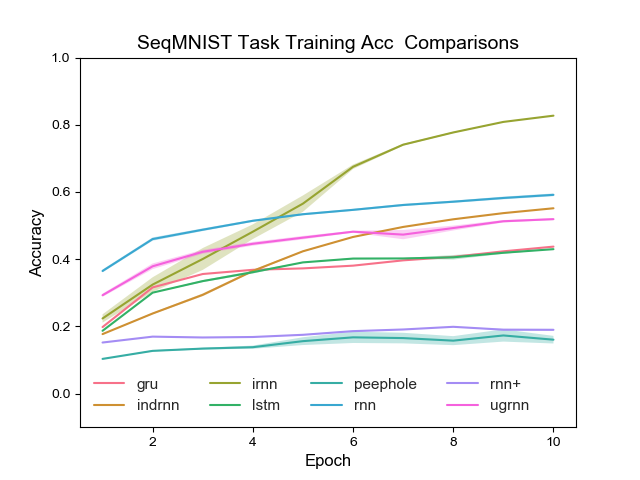

In [8]:
Image('results/smnist_train_acc.png')

In the above image we see the training accuracy for our models. We note that rnn+ is the intersection rnn and indrnn is a slight variation on the standard rnn that we haven't discussed.

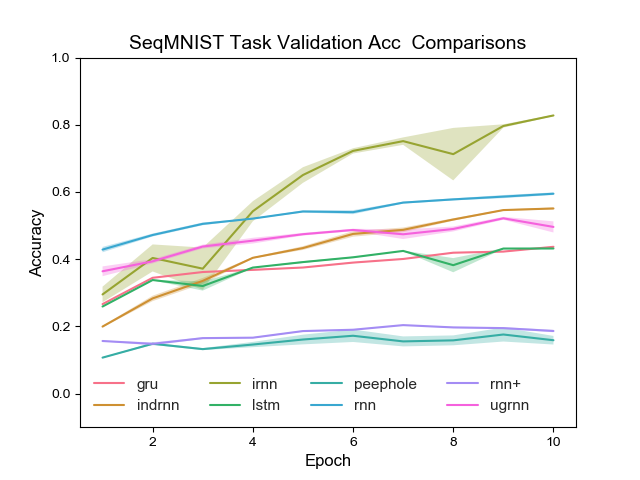

In [9]:
Image('results/smnist_val_acc.png')

Again we see the same models, but this time with validation accuracy. We note that the top two performers are the irnn (identity RNN) and the standard RNN. This is not at all expected and further investigation is needed.